<a href="https://colab.research.google.com/github/tensorvijay/Driftscan/blob/master/Galaxy_morphology_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

# New Section

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/

/content/drive


In [ ]:
cd ../


/content


In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/galaxy/images_test_rev1.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

KeyboardInterrupt: ignored

Use Glob to store image addersses in the form of a list

In [ ]:

import glob as glob

files_test= glob.glob('../content/images_test_rev1/*.jpg')


In [ ]:
len(files_test)

79975

In [ ]:
print(files_test[2])

../content/images_test_rev1/593426.jpg


In [ ]:
!unzip '/content/drive/My Drive/galaxy/images_training_rev1 (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflati

In [ ]:

import glob as glob
files_train= glob.glob('../content/images_training_rev1/*.jpg')


In [ ]:
len(files_train)

61578

In [ ]:
print(files_train[1])

../content/images_training_rev1/953716.jpg


In [ ]:
print(samples_train[100])

25074


In [ ]:
print(np.min(samples_train))

28


In [ ]:
len(samples_train)

3000

In [ ]:
{
    'train':len(files_train),
    'test':len(files_test)
}

{'test': 79975, 'train': 61578}

Load the Training data solutions from the Training data exel file

In [ ]:

y_path = '../content/drive/My Drive/galaxy/training_solutions_rev1.csv'

read image based on address and convert them into a numpy array

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    return(x)

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

import PIL.Image as im

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data frame showing the Galaxy ID and the corresponding class probabilitiees

In [ ]:
print(files_train[0])

../content/images_training_rev1/411790.jpg


In [ ]:
train = np.array([readImage(files_train[x_train])
                  for x_train in range(3000)
                 ])

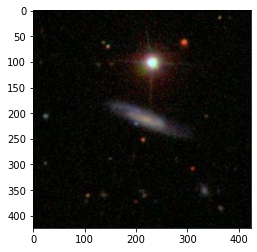

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train[2999,:,:,:])

Ram management successful load images iteratively to save memory instead of cramming up memory space

In [ ]:
count=0
tot=train
del train
#augmenter=[]
for i in range(6):
  count+=3000
  train1 =  np.array([readImage(files_train[x_train])
                  for x_train in range(count,count+3000)
                 ])
  #augmenter1=augmenter
  tot=np.append(tot,train1,axis=0)
  del train1

In [ ]:
train.shape

(21000, 424, 424, 3)

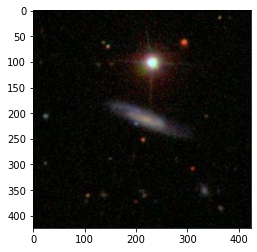

In [ ]:
plt.imshow(tot[2999,:,:,:])

we are checking if augmentation has been performed in a safe  manner

In [ ]:
test = np.array([readImage(files_train[x_train])
                  for x_train in range(21000,24000)
                 ])

In [ ]:
test.nbytes

1617984000

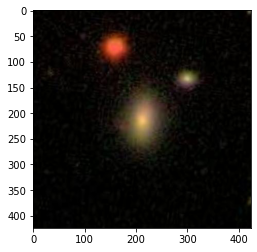

In [ ]:
plt.imshow(test[2999,:,:,:])


In [ ]:
count=0
ttest=test
del test
start=21000
#augmenter=[]
for i in range(2):
  count+=3000
  start+=count
  train1 =  np.array([readImage(files_train[x_train])
                  for x_train in range(start,start+3000)
                 ])
  #augmenter1=augmenter
  ttest=np.append(ttest,train1,axis=0)
  del train1

In [ ]:
ttest.shape

(9000, 424, 424, 3)

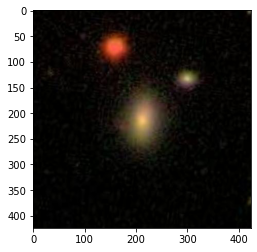

In [ ]:
plt.imshow(ttest[2999,:,:,:])

In [ ]:
test_index = np.arange(21000,30000,1)

In [ ]:
train_index=np.arange(0,21000,1)

In [ ]:
train_index[20999]

20999

In [ ]:
print(x[8999])

29999


In [ ]:
print("%d bytes" % (tot.size * tot.itemsize))

11325888000 bytes


-113258880009

In [ ]:
train_y = pd.read_csv(y_path,index_col='GalaxyID')

len(train_y)

print(train_y)

          Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
GalaxyID                                ...                                 
100008    0.383147  0.616853  0.000000  ...   0.000000        0.0   0.325512
100023    0.327001  0.663777  0.009222  ...   0.000000        0.0   0.000000
100053    0.765717  0.177352  0.056931  ...   0.000000        0.0   0.000000
100078    0.693377  0.238564  0.068059  ...   0.000000        0.0   0.000000
100090    0.933839  0.000000  0.066161  ...   0.000000        0.0   0.000000
...            ...       ...       ...  ...        ...        ...        ...
999948    0.510379  0.489621  0.000000  ...   0.000000        0.0   0.226257
999950    0.901216  0.098784  0.000000  ...   0.000000        0.0   0.000000
999958    0.202841  0.777376  0.019783  ...   0.000000        0.0   0.072296
999964    0.091000  0.909000  0.000000  ...   0.023065        0.0   0.045334
999967    0.767000  0.140000  0.093000  ...   0.000000        0.0   0.023380

Matrix corresponding to image index, size and dimensions

Sample representation of a saved image for representational purposes

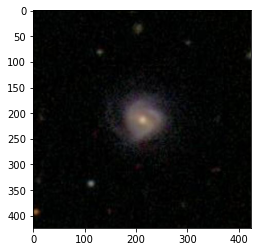

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train[290,:,:,:])

In [ ]:
files_train[10]

'../content/images_training_rev1/320244.jpg'

The above stored adresses in the files_train list is split and the index is retreived below to bring out the proabilities corresponding to the Galaxy Id which acts as the probabilistic mutliclass label

In [ ]:
test_index

test_y = np.array([train_y.loc[
            np.int64(files_train[galaxy_id].split('/')[-1].split('.')[0]),:]
                    for galaxy_id in test_index])




In [ ]:
files_train[21000]

'../content/images_training_rev1/708201.jpg'

In [ ]:
#print(test_y)

test_y.shape   #test label

(9000, 37)

In [ ]:
len(train_y)

print(train_y)

train_y.shape

[[0.891264   0.068833   0.039903   ... 0.         0.         0.        ]
 [0.914979   0.085021   0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.239544   0.760456   0.         ... 0.06385361 0.         0.1845835 ]
 [0.7654     0.233251   0.001349   ... 0.         0.         0.        ]
 [0.142739   0.845754   0.011507   ... 0.07678405 0.         0.41896793]]


(3000, 37)

SVD based compression

In [ ]:
w, h, d = tot[290,:,:,:].shape

X = tot[290,:,:,:].reshape((w * h, d))
K = 20 # the desired number of colors in the compressed image

In [ ]:
tot[290,:,:,:].nbytes

539328

In [ ]:
tot[290,:,:,:].nbytes

539328

CHecking the memory of image size

In [ ]:
img_gray.nbytes-tot[290,:,:,:].nbytes

898880

In [ ]:
img=tot[290,:,:,:]

In [ ]:
 img_array_transposed= np.transpose(img, (2, 0, 1))

U, s, Vt = np.linalg.svd(img_array_transposed)

In [ ]:
img_array_transposed.shape

(3, 424, 424)

In [ ]:
Sigma = np.zeros(img_array_transposed.shape)
for j in range(3):
       np.fill_diagonal(Sigma[j, :, :], s[j, :])

reconstructed = U @ Sigma @ Vt

In [ ]:
rec=np.transpose(reconstructed, (1, 2, 0))

Singular value decomposiotion resulg( Not used in the training or testing)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


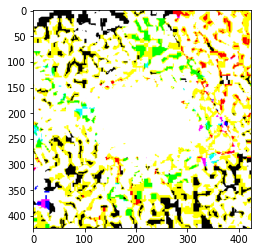

In [ ]:
plt.imshow(rec)

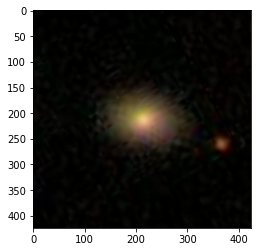

In [ ]:
plt.imshow(img)

In [ ]:
tot[290,:,:,:]

In [ ]:
from numpy import linalg

In [ ]:
idx = find_closest_centroids(X, colors)

In [ ]:
train_y = np.array([train_y.loc[
            np.int64(files_train[galaxy_id].split('/')[-1].split('.')[0]),:]
                    for galaxy_id in train_index])

In [ ]:
train_y.shape

(21000, 37)

In [ ]:
shape_kernel = (2,2)
shape_pool = (2,2)

conv_activation = 'relu'
dense_activation = 'relu'


num_classes = len(train_y[0])   #train label
epochs = 10

img_rows, img_cols = 424, 424
img_channels = 3

VGG MODEL

In [ ]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers import MaxPool2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics

model = Sequential()

model.add(Conv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))

model.add(Conv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))


model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(BatchNormalization())

model.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 211, 211, 30)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 211, 211, 64)      17344     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 105, 105, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 105, 105, 128)     73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 105, 105, 128)    

In [ ]:
checkpoint_filepath = '/content/'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

learning_rate = 0.001
decay_rate = 0.45
momentum = 0.9

model.compile(loss = keras.losses.kullback_leibler_divergence,
              optimizer = keras.optimizers.SGD(learning_rate = 0.001,decay=decay_rate,momentum = 0.9,nesterov=False),
              metrics = [metrics.mean_squared_error])



model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=10,
          verbose=2,
          callbacks=[model_checkpoint_callback]
          )

Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 1010s - loss: -5.6390e-01 - mean_squared_error: 0.2307 - val_loss: 6.0184 - val_mean_squared_error: 0.3675
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 1007s - loss: -6.6473e-01 - mean_squared_error: 0.2289 - val_loss: 6.4735 - val_mean_squared_error: 0.3984
Epoch 3/10
 - 1007s - loss: -6.8725e-01 - mean_squared_error: 0.2286 - val_loss: 6.5111 - val_mean_squared_error: 0.3937
Epoch 4/10
 - 1007s - loss: -7.2096e-01 - mean_squared_error: 0.2281 - val_loss: 7.2594 - val_mean_squared_error: 0.3911
Epoch 5/10
 - 1007s - loss: -7.2567e-01 - mean_squared_error: 0.2280 - val_loss: 7.5267 - val_mean_squared_error: 0.3884
Epoch 6/10
 - 1008s - loss: -7.3016e-01 - mean_squared_error: 0.2280 - val_loss: 6.8679 - val_mean_squared_error: 0.3953
Epoch 7/10
 - 1007s - loss: -7.3803e-01 - mean_squared_error: 0.2279 - val_loss: 6.5234 - val_mean_squared_error: 0.3904
Epoch 8/10
 - 1006s - loss: -7.5403e-01 - mean_squared_error: 0.2276 - val_loss: 6.5673 - val_mean_squared_error: 0.3891
Epoch 9/10
 - 1006s - loss: -7.6566e-01 - mean_squared_error: 0.2274 - val_loss: 7.9829 - val_mean_squared_error: 0.3945
Epoch 10/10
 - 1006s - loss: -7.6619e-01 - 

In [ ]:
model.save('vgg.hd5')

In [ ]:
check=model.predict_proba(ttest)

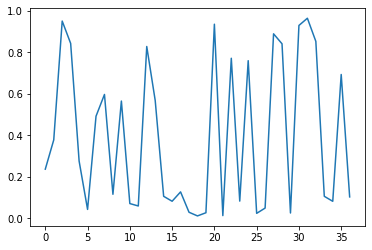

In [ ]:
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import plot
mse = mean_squared_error(test_y, check, multioutput='raw_values')

plot(mse)

Simple model with batch normalization

In [ ]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))

model.add(Conv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Conv2D(filters=25,
                 kernel_size=shape_kernel,
                 name='Conv-03',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=20,
                 kernel_size=shape_kernel,
                 name='Conv-04',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=15,
                 kernel_size=shape_kernel,
                 name='Conv-05',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=10,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-06',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=15,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-07',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=2,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-08',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Flatten())

model.add(Dense(
        units=150,
        name='Dense-02',
        activation = dense_activation
    ))

model.add(Dropout(0.5))
model.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
batch_normalization_1 (Batch (None, 422, 422, 30)      120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 25)      3025      
_________________________________________________________________
batch_normalization_2 (Batch (None, 210, 210, 25)      100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 105, 25)     

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

tb = TensorBoard(
        log_dir='../tensorboard/model_v4/',
        write_graph=True,
        write_images=True
    )

mc = ModelCheckpoint(filepath='/content/drive/batch.hd5',
                     save_best_only=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=2),
              metrics = [metrics.MSE])

model.fit(x = tot,
          validation_split=0.1,
          y = train_y,
          batch_size=10,
          epochs=epochs,
          verbose=2)




Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 728s - loss: 14.9892 - mean_squared_error: 0.0401 - val_loss: 14.7543 - val_mean_squared_error: 0.0306
Epoch 2/10
 - 718s - loss: 14.6318 - mean_squared_error: 0.0252 - val_loss: 14.5463 - val_mean_squared_error: 0.0223
Epoch 3/10
 - 718s - loss: 14.5395 - mean_squared_error: 0.0233 - val_loss: 14.3532 - val_mean_squared_error: 0.0208
Epoch 4/10
 - 718s - loss: 14.4809 - mean_squared_error: 0.0219 - val_loss: 14.3684 - val_mean_squared_error: 0.0205
Epoch 5/10
 - 718s - loss: 14.4320 - mean_squared_error: 0.0202 - val_loss: 14.4901 - val_mean_squared_error: 0.0198
Epoch 6/10
 - 719s - loss: 14.3960 - mean_squared_error: 0.0187 - val_loss: 14.4210 - val_mean_squared_error: 0.0181
Epoch 7/10
 - 718s - loss: 14.3753 - mean_squared_error: 0.0179 - val_loss: 14.3350 - val_mean_squared_error: 0.0170
Epoch 8/10
 - 718s - loss: 14.3496 - mean_squared_error: 0.0175 - val_loss: 14.3717 - val_mean_squared_error: 0.0183
Epoch 9/10
 - 7

In [ ]:
model.save('batch.hd5')

In [ ]:
conv=np.float64(predmsq)

kldpred=keras.losses.kullback_leibler_divergence(test_y,conv)

In [ ]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics
from keras.layers import BatchNormalization




model = Sequential()

model.add(Conv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))

model.add(Conv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Conv2D(filters=25,
                 kernel_size=shape_kernel,
                 name='Conv-03',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=20,
                 kernel_size=shape_kernel,
                 name='Conv-04',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=15,
                 kernel_size=shape_kernel,
                 name='Conv-05',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=10,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-06',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=15,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-07',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=2,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-08',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Flatten())

model.add(Dense(
        units=150,
        name='Dense-02',
        activation = dense_activation
    ))


model.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = [metrics.mean_squared_error])

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=100,
          verbose=2)

Train on 18900 samples, validate on 2100 samples
Epoch 1/100
 - 398s - loss: 15.3047 - mean_squared_error: 0.0481 - val_loss: 14.8337 - val_mean_squared_error: 0.0267
Epoch 2/100
 - 398s - loss: 14.7716 - mean_squared_error: 0.0253 - val_loss: 14.6544 - val_mean_squared_error: 0.0239
Epoch 3/100
 - 398s - loss: 14.6364 - mean_squared_error: 0.0237 - val_loss: 14.5502 - val_mean_squared_error: 0.0229
Epoch 4/100
 - 398s - loss: 14.5531 - mean_squared_error: 0.0216 - val_loss: 14.5164 - val_mean_squared_error: 0.0208
Epoch 5/100
 - 398s - loss: 14.5011 - mean_squared_error: 0.0199 - val_loss: 14.4287 - val_mean_squared_error: 0.0186
Epoch 6/100
 - 398s - loss: 14.4567 - mean_squared_error: 0.0187 - val_loss: 14.4230 - val_mean_squared_error: 0.0185
Epoch 7/100
 - 399s - loss: 14.4231 - mean_squared_error: 0.0179 - val_loss: 14.3754 - val_mean_squared_error: 0.0172
Epoch 8/100
 - 398s - loss: 14.3944 - mean_squared_error: 0.0174 - val_loss: 14.3804 - val_mean_squared_error: 0.0173
Epoch 9

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss = 'categorical_crossentropy',               #curent execution
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = ['mean_squared_error'])




filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=100,
          verbose=2,
          callbacks=callbacks_list)

Train on 18900 samples, validate on 2100 samples
Epoch 1/100
 - 307s - loss: 14.3306 - mean_squared_error: 0.0179 - val_loss: 14.3031 - val_mean_squared_error: 0.0172

Epoch 00001: saving model to weights-improvement-01-14.30.hdf5
Epoch 2/100
 - 309s - loss: 14.3112 - mean_squared_error: 0.0178 - val_loss: 14.2890 - val_mean_squared_error: 0.0183

Epoch 00002: saving model to weights-improvement-02-14.29.hdf5
Epoch 3/100
 - 308s - loss: 14.2954 - mean_squared_error: 0.0177 - val_loss: 14.2520 - val_mean_squared_error: 0.0174

Epoch 00003: saving model to weights-improvement-03-14.25.hdf5
Epoch 4/100
 - 307s - loss: 14.2813 - mean_squared_error: 0.0177 - val_loss: 14.2346 - val_mean_squared_error: 0.0172

Epoch 00004: saving model to weights-improvement-04-14.23.hdf5
Epoch 5/100
 - 308s - loss: 14.2627 - mean_squared_error: 0.0175 - val_loss: 14.2508 - val_mean_squared_error: 0.0175

Epoch 00005: saving model to weights-improvement-05-14.25.hdf5
Epoch 6/100
 - 308s - loss: 14.2524 - mea

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss = 'categorical_crossentropy',               #curent execution
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = ['mean_squared_error'])



filepath="/content/drive/My Drive/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=100,
          verbose=2,
          callbacks=callbacks_list)

Train on 18900 samples, validate on 2100 samples
Epoch 1/100
 - 94s - loss: 15.2804 - mean_squared_error: 0.0438 - val_loss: 15.0648 - val_mean_squared_error: 0.0263

Epoch 00001: saving model to /content/drive/My Drive/weights-improvement-01-15.06.hdf5
Epoch 2/100


KeyboardInterrupt: ignored

In [ ]:
cd ../

/


In [ ]:
cd ../

/content/drive


In [ ]:
cd /content

/content


In [ ]:
ls

drive/  images_training_rev1/  sample_data/


In [ ]:
ls

'My Drive'/


In [ ]:
cd 'My Drive'/

/content/drive/My Drive


In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
print(conv.shape)

nparray=np.array([kldpred])

(9000, 37)


In [ ]:
nparray.mean()   #KLD number


3.7849160464747604

Modified AlexNet model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 25)      3025      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 105, 25)      0         
_________________________________________________________________
Conv-04 (Conv2D)             (None, 104, 104, 20)      2020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 52, 52, 20)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = [metrics.cosine])

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=epochs,
          verbose=2)

Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 314s - loss: 15.3548 - cosine_proximity: 0.8058 - val_loss: 14.8675 - val_cosine_proximity: 0.8393
Epoch 2/10
 - 307s - loss: 15.0022 - cosine_proximity: 0.8408 - val_loss: 14.7436 - val_cosine_proximity: 0.8481
Epoch 3/10
 - 307s - loss: 14.8855 - cosine_proximity: 0.8503 - val_loss: 14.6183 - val_cosine_proximity: 0.8579
Epoch 4/10
 - 307s - loss: 14.7702 - cosine_proximity: 0.8588 - val_loss: 14.5212 - val_cosine_proximity: 0.8656
Epoch 5/10
 - 307s - loss: 14.6854 - cosine_proximity: 0.8645 - val_loss: 14.4504 - val_cosine_proximity: 0.8700
Epoch 6/10
 - 307s - loss: 14.6233 - cosine_proximity: 0.8686 - val_loss: 14.4449 - val_cosine_proximity: 0.8707
Epoch 7/10
 - 308s - loss: 14.5801 - cosine_proximity: 0.8715 - val_loss: 14.3832 - val_cosine_proximity: 0.8726
Epoch 8/10
 - 307s - loss: 14.5400 - cosine_proximity: 0.8743 - val_loss: 14.3526 - val_cosine_proximity: 0.8758
Epoch 9/10
 - 307s - loss: 14.5102 - cosine_pro

In [ ]:
predmsq=model.predict_proba(ttest)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predmsq, multioutput='raw_values')

plot(mse)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = [metrics.mean_squared_error])

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=epochs,
          verbose=2)

Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 307s - loss: 14.4594 - mean_squared_error: 0.0185 - val_loss: 14.3647 - val_mean_squared_error: 0.0188
Epoch 2/10
 - 306s - loss: 14.4326 - mean_squared_error: 0.0178 - val_loss: 14.2790 - val_mean_squared_error: 0.0176
Epoch 3/10
 - 306s - loss: 14.4102 - mean_squared_error: 0.0174 - val_loss: 14.2658 - val_mean_squared_error: 0.0173
Epoch 4/10
 - 306s - loss: 14.3913 - mean_squared_error: 0.0171 - val_loss: 14.2330 - val_mean_squared_error: 0.0169
Epoch 5/10
 - 306s - loss: 14.3707 - mean_squared_error: 0.0168 - val_loss: 14.2173 - val_mean_squared_error: 0.0167
Epoch 6/10
 - 306s - loss: 14.3540 - mean_squared_error: 0.0166 - val_loss: 14.1913 - val_mean_squared_error: 0.0163
Epoch 7/10
 - 306s - loss: 14.3404 - mean_squared_error: 0.0165 - val_loss: 14.2001 - val_mean_squared_error: 0.0164
Epoch 8/10
 - 306s - loss: 14.3239 - mean_squared_error: 0.0163 - val_loss: 14.1911 - val_mean_squared_error: 0.0164
Epoch 9/10
 - 3

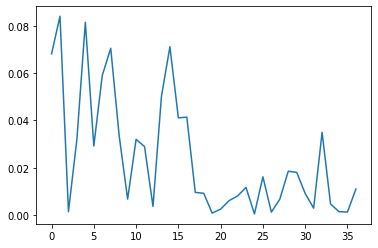

In [ ]:
from matplotlib.pyplot import plot


predmsq=model.predict_proba(ttest)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predmsq, multioutput='raw_values')

plot(mse) #similar patterns are formed which result

#exact similar graph has been observed even with batch normalization so does it justify?

In [ ]:
MSENP = (np.square(test_y - predmsq)).mean(axis=0)

In [ ]:
print(MSENP)

[0.0681128  0.08401772 0.00140071 0.03208626 0.08148181 0.02917793
 0.05898771 0.07047788 0.03346934 0.00671105 0.03199928 0.02892253
 0.0036211  0.05017953 0.07113856 0.04106039 0.04137091 0.00956295
 0.00918619 0.00080426 0.00250004 0.00608069 0.00801311 0.01167425
 0.00046249 0.01612353 0.00122041 0.0067086  0.01850565 0.01801596
 0.00912194 0.00289844 0.03492668 0.00468043 0.00140387 0.00126903
 0.01096613]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
batch_normalization_1 (Batch (None, 422, 422, 30)      120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 25)      3025      
_________________________________________________________________
batch_normalization_2 (Batch (None, 210, 210, 25)      100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 105, 25)     

In [ ]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics
from keras.layers import SeparableConv2D

model = Sequential()

#model.add(Conv2D())
model.add(SeparableConv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(SeparableConv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))

model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(SeparableConv2D(filters=25,
                 kernel_size=shape_kernel,
                 name='Conv-03',
                 activation = conv_activation
                ))

model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(SeparableConv2D(filters=20,
                 kernel_size=shape_kernel,
                 name='Conv-04',
                 activation = conv_activation
                ))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(SeparableConv2D(filters=15,
                 kernel_size=shape_kernel,
                 name='Conv-05',
                 activation = conv_activation
                ))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(SeparableConv2D(filters=10,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-06',
                 activation = conv_activation
                ))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(SeparableConv2D(filters=15,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-07',
                 activation = conv_activation
                ))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters=2,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-08',
                 activation = conv_activation
                ))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(
        units=150,
        name='Dense-02',
        activation = dense_activation
    ))
model.add(Dropout(0.5))

model.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
sepmodel=model

sepmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (SeparableConv2D) (None, 423, 423, 35)      152       
_________________________________________________________________
batch_normalization_10 (Batc (None, 423, 423, 35)      140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 423, 423, 35)      0         
_________________________________________________________________
Conv-02 (SeparableConv2D)    (None, 422, 422, 30)      1220      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (SeparableConv2D)    (None, 210, 210, 25)      895       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 105, 105, 25)     

In [ ]:
from keras.callbacks import ModelCheckpoint

sepmodel.compile(loss = 'categorical_crossentropy',               #curent execution
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = ['mean_squared_error'])



filepath="/content/drive/My Drive/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

sepmodel.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=100,
          verbose=2,
          callbacks=callbacks_list)

Train on 18900 samples, validate on 2100 samples
Epoch 1/100
 - 649s - loss: 16.6038 - mean_squared_error: 0.1432 - val_loss: 15.8190 - val_mean_squared_error: 0.1128

Epoch 00001: saving model to /content/drive/My Drive/weights-improvement-01-15.82.hdf5
Epoch 2/100
 - 646s - loss: 15.9334 - mean_squared_error: 0.1024 - val_loss: 15.8097 - val_mean_squared_error: 0.0960

Epoch 00002: saving model to /content/drive/My Drive/weights-improvement-02-15.81.hdf5
Epoch 3/100
 - 645s - loss: 15.7295 - mean_squared_error: 0.0824 - val_loss: 15.8602 - val_mean_squared_error: 0.0834

Epoch 00003: saving model to /content/drive/My Drive/weights-improvement-03-15.86.hdf5
Epoch 4/100
 - 645s - loss: 15.5577 - mean_squared_error: 0.0677 - val_loss: 15.7954 - val_mean_squared_error: 0.0692

Epoch 00004: saving model to /content/drive/My Drive/weights-improvement-04-15.80.hdf5
Epoch 5/100
 - 647s - loss: 15.4334 - mean_squared_error: 0.0568 - val_loss: 15.8163 - val_mean_squared_error: 0.0625

Epoch 00

In [ ]:
sepmodel.summary()

NameError: ignored

In [ ]:
predmsq=model.predict_proba(ttest) #batch normalized archiecture result

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predmsq, multioutput='raw_values')

plot(mse)

NameError: ignored

In [ ]:
checkpoint_filepath = '/content/'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

learning_rate = 0.1
decay_rate = 0.45
momentum = 0.9

sepmodel.compile(loss = keras.losses.kullback_leibler_divergence,
              optimizer = keras.optimizers.SGD(learning_rate = 0.1,decay=decay_rate,momentum = 0.9,nesterov=False),
              metrics = [metrics.mean_squared_error])



sepmodel.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=10,
          verbose=2,
          callbacks=[model_checkpoint_callback]
          )

Train on 18900 samples, validate on 2100 samples
Epoch 1/10


KeyboardInterrupt: ignored

Xception Net experimet

In [ ]:
from keras.layers import BatchNormalization
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics


Xcep = Sequential()

Xcep.add(Conv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))
Xcep.add(BatchNormalization())

Xcep.add(Conv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))
Xcep.add(BatchNormalization())
Xcep.add(MaxPooling2D(pool_size=shape_pool
                      ))

Xcep.add(Conv2D(filters=12,
                 kernel_size=shape_kernel,
                 name='Conv-03',
                 activation = conv_activation
                ))
Xcep.add(BatchNormalization())

In [ ]:
Xcep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
batch_normalization_5 (Batch (None, 423, 423, 35)      140       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
batch_normalization_6 (Batch (None, 422, 422, 30)      120       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 12)      1452      
_________________________________________________________________
batch_normalization_7 (Batch (None, 210, 210, 12)     

In [ ]:
from keras.applications import Xception

Xcep.add(Xception())

Xcep.add(BatchNormalization())

Xcep.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
Xcep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
batch_normalization_5 (Batch (None, 423, 423, 35)      140       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
batch_normalization_6 (Batch (None, 422, 422, 30)      120       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 12)      1452      
_________________________________________________________________
batch_normalization_7 (Batch (None, 210, 210, 12)     

In [ ]:
#from keras.callbacks import ModelCheckpoint


learning_rate = 0.1
decay_rate = 0.45
momentum = 0.9

Xcep.compile(loss = keras.losses.kullback_leibler_divergence,
              optimizer = keras.optimizers.SGD(learning_rate = 0.1,decay=decay_rate,momentum = 0.9,nesterov=False),
              metrics = [metrics.mean_squared_error])

checkpoint_filepath = '/content/'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

Xcep.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=10,
          verbose=2,
          callbacks=[model_checkpoint_callback]
          )

Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 1875s - loss: -4.0963e+00 - mean_squared_error: 0.5985 - val_loss: -4.1724e+00 - val_mean_squared_error: 0.6354
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


KeyboardInterrupt: ignored

In [ ]:
keras.backend.clear_session()

In [ ]:
modelmsq=model

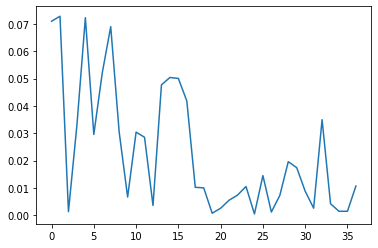

In [ ]:
predmsq=model.predict_proba(ttest)  #simple model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predmsq, multioutput='raw_values')

plot(mse)

Alex Net based model result

In [ ]:
MSENP = (np.square(test_y - predmsq)).mean(axis=0)

In [ ]:
MSENP

array([0.0681128 , 0.08401772, 0.00140071, 0.03208626, 0.08148181,
       0.02917793, 0.05898771, 0.07047788, 0.03346934, 0.00671105,
       0.03199928, 0.02892253, 0.0036211 , 0.05017953, 0.07113856,
       0.04106039, 0.04137091, 0.00956295, 0.00918619, 0.00080426,
       0.00250004, 0.00608069, 0.00801311, 0.01167425, 0.00046249,
       0.01612353, 0.00122041, 0.0067086 , 0.01850565, 0.01801596,
       0.00912194, 0.00289844, 0.03492668, 0.00468043, 0.00140387,
       0.00126903, 0.01096613])

In [ ]:
conv=np.float64(predmsq)

kldpred=keras.losses.kullback_leibler_divergence(test_y,conv)

NameError: ignored

In [ ]:
print(kldpred)

array=np.array([kldpred])

tf.Tensor([1.8881228  3.26188462 2.71718697 ... 1.59180129 4.19515139 2.15252828], shape=(9000,), dtype=float64)


In [ ]:
print(array.mean()) #KLD_DIVERGENCE_LOSS

3.0775992681165256


In [ ]:
y_true = np.random.random(size=(2, 3))
y_pred = np.random.random(size=(2, 3))
loss = tf.keras.losses.kullback_leibler_divergence(y_true, y_pred)
ar=np.array([loss])

print(ar.mean())

-0.3067787337947108


In [ ]:
print(y_pred)

[[0.04898094 0.23907055 0.82230129]
 [0.1623068  0.55290556 0.00956643]]


In [ ]:
kldprednp=np.sum(test_y*np.log(test_y/predmsq),axis=0))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


tf.Tensor(1.8881227971834025, shape=(), dtype=float64)


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=5),
              metrics = [metrics.mean_squared_error])

model.fit(tot,
          validation_split=0.1,
          y=train_y,
          batch_size=10,
          epochs=epochs,
          verbose=2)

Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 293s - loss: 15.3599 - mean_squared_error: 0.0332 - val_loss: 15.1081 - val_mean_squared_error: 0.0306
Epoch 2/10


KeyboardInterrupt: ignored

In [ ]:
modelmsq.save('modelmsq.hd5')

In [ ]:
Pred=model.predict_classes(ttest)

In [ ]:
Pred=model.predict_proba(ttest)

In [ ]:
Pred.shape

(9000, 37)

In [ ]:
print(Pred)

[[9.5799124e-01 2.6417568e-01 3.8772486e-02 ... 1.2805776e-04
  9.2458952e-04 1.9991603e-02]
 [6.1007541e-01 5.5392069e-01 2.1335345e-02 ... 1.2146900e-03
  3.4912738e-03 5.7925161e-02]
 [4.1580975e-01 6.6106778e-01 1.1495224e-02 ... 1.9003729e-03
  3.8224002e-03 9.2435911e-02]
 ...
 [6.2112933e-01 5.7505882e-01 4.0002618e-02 ... 7.5927041e-03
  7.4520716e-03 1.1355828e-01]
 [1.8091884e-01 8.7499869e-01 1.5286831e-02 ... 3.8722681e-03
  8.3755925e-03 8.7102041e-02]
 [2.6052275e-01 7.7866793e-01 2.1198574e-02 ... 1.7885514e-02
  1.8445220e-02 1.4433332e-01]]


In [ ]:
model.save('mymode.hd5')

In [ ]:
Diff=test_y-Pred

sqdiff=np.square(Diff)
avg=np.mean(Diff,axis=0)

In [ ]:
avg.shape

(37,)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, Pred, multioutput='raw_values')

In [ ]:
from sklearn.metrics import pairwise

Cosd=pairwise.cosine_similarity(np.transpose(test_y),np.transpose(Pred))

In [ ]:
Cosd.shape

Cosd_mean=np.mean(Cosd,axis=0)

In [ ]:
print(Cosd_mean)

[0.42815416 0.51370779 0.40447147 0.27385674 0.50152653 0.4738414
 0.50506015 0.44846865 0.50511888 0.3721385  0.47387981 0.4719436
 0.47981321 0.50755986 0.50752342 0.32929463 0.43069928 0.30429021
 0.43758649 0.45236367 0.49742432 0.42101078 0.45732862 0.44462002
 0.34676941 0.2870537  0.24753257 0.1988983  0.43348278 0.43377635
 0.46466112 0.45839938 0.44006891 0.3360005  0.33085637 0.38453436
 0.47166056]


checkign cosine proximity

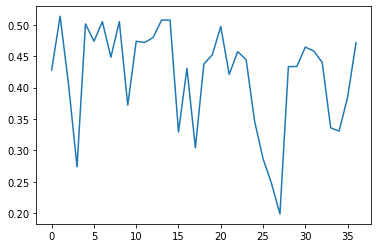

In [ ]:
plot(Cosd_mean)

In [ ]:
print(mse)

[0.0850055  0.07644865 0.00152947 0.04128933 0.07535173 0.03029666
 0.05459719 0.07036759 0.03190458 0.0072479  0.03128463 0.02966943
 0.00366432 0.04934995 0.06028371 0.05484155 0.04905776 0.01372417
 0.01031724 0.00076238 0.00273258 0.00574005 0.00785547 0.01084509
 0.00051167 0.01926777 0.00142861 0.00926464 0.02008625 0.01764235
 0.00904899 0.00261654 0.03559624 0.00428343 0.00146917 0.00147349
 0.01114276]


In [ ]:
mse.shape

(37,)

In [ ]:
MSENP = (np.square(test_y - Pred)).mean(axis=0)

In [ ]:
print(MSENP)

[0.0850055  0.07644865 0.00152947 0.04128933 0.07535173 0.03029666
 0.05459719 0.07036759 0.03190458 0.0072479  0.03128463 0.02966943
 0.00366432 0.04934995 0.06028371 0.05484155 0.04905776 0.01372417
 0.01031724 0.00076238 0.00273258 0.00574005 0.00785547 0.01084509
 0.00051167 0.01926777 0.00142861 0.00926464 0.02008625 0.01764235
 0.00904899 0.00261654 0.03559624 0.00428343 0.00146917 0.00147349
 0.01114276]


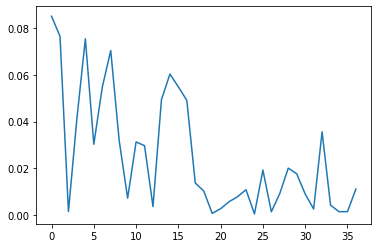

In [ ]:
from matplotlib.pyplot import plot
f=np.arange(0,37,1)
plot(f,mse)

In [ ]:
 cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)

 loss=cosine_loss(double(test_y), double(Pred)).numpy()

 print(loss)

NameError: ignored

In [ ]:
DOT=np.dot(test_y,Pred)

In [ ]:
print(avg)

[-8.59668215e-02 -5.13433779e-02 -5.14654682e-03 -2.34479919e-02
 -1.38773234e-02 -8.24633158e-03 -1.51471902e-02  7.63548207e-03
 -2.69068870e-02 -6.54130586e-03 -8.79134908e-03  4.36531160e-03
 -3.83670584e-03 -2.05966368e-02 -9.27894272e-02 -2.60646087e-02
 -4.97727132e-02 -1.54300597e-02 -2.73915839e-04  1.14509943e-04
 -9.00983532e-03 -4.76632161e-03 -8.19035975e-03 -4.27336125e-03
 -9.60910001e-04 -2.09750613e-02 -3.14053229e-03 -6.43913869e-03
  5.53557593e-03  4.75491605e-03 -3.89144325e-03  1.70878215e-03
  5.35016736e-03  1.89433131e-05  1.34331110e-03  1.48459631e-03
 -6.49422822e-03]


In [ ]:
from sklearn import metrics as cosim


cosd=cosim.pairwise.cosine_similarity(Pred,test_y,axis=1)

TypeError: ignored

In [ ]:
print(cosd.shape)

(9000, 9000)


In [ ]:
print(Diff)

[[-1.56884242e-01 -6.52826833e-02 -3.87724862e-02 ... -1.28057756e-04
  -9.24589520e-04  5.68415583e-02]
 [-4.07051414e-01  2.43055314e-01 -2.13353448e-02 ... -1.21469004e-03
  -3.49127385e-03  1.63120684e-01]
 [-1.41414751e-01  4.50582162e-02  7.98377580e-03 ... -1.90037291e-03
  -3.82240023e-03 -2.55205873e-02]
 ...
 [-2.51473340e-02 -2.18611818e-01  7.56838201e-03 ... -7.59270415e-03
  -7.45207164e-03 -1.13558277e-01]
 [ 2.58501574e-02 -9.54256887e-02 -1.62783119e-03 ... -3.87226813e-03
  -8.37559253e-03  3.13688964e-02]
 [ 5.84424700e-03 -4.50349268e-02 -2.11985745e-02 ... -1.78855136e-02
  -1.84452198e-02  2.33244111e-01]]


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = [metrics.cosine])

model.fit(tot,
          validation_split=0.1,
          y = y_train,
          batch_size=10,
          epochs=epochs,
          verbose=2)

Train on 2700 samples, validate on 300 samples
Epoch 1/200
 - 14s - loss: 15.9673 - cosine_proximity: 0.7434 - val_loss: 15.6733 - val_cosine_proximity: 0.7953
Epoch 2/200
 - 13s - loss: 15.4580 - cosine_proximity: 0.8015 - val_loss: 15.5949 - val_cosine_proximity: 0.8105
Epoch 3/200
 - 14s - loss: 15.4074 - cosine_proximity: 0.8084 - val_loss: 15.6153 - val_cosine_proximity: 0.8141
Epoch 4/200
 - 13s - loss: 15.3727 - cosine_proximity: 0.8123 - val_loss: 15.4994 - val_cosine_proximity: 0.8176
Epoch 5/200
 - 13s - loss: 15.3325 - cosine_proximity: 0.8157 - val_loss: 15.4793 - val_cosine_proximity: 0.8221
Epoch 6/200
 - 14s - loss: 15.2852 - cosine_proximity: 0.8205 - val_loss: 15.3985 - val_cosine_proximity: 0.8273
Epoch 7/200
 - 14s - loss: 15.2247 - cosine_proximity: 0.8262 - val_loss: 15.3565 - val_cosine_proximity: 0.8315
Epoch 8/200
 - 14s - loss: 15.1590 - cosine_proximity: 0.8321 - val_loss: 15.2964 - val_cosine_proximity: 0.8351
Epoch 9/200
 - 13s - loss: 15.1069 - cosine_proxi

In [ ]:
print(model)

Read the images iteratively and predict the proabilities using the given model

In [ ]:
def predict_score(file_path,model_name):

    scores = {}
    paths = file_path


    for path in paths:

        path_id = path.split('/')[-1].split('.')[0]
        path_data = np.array([readImage(path)])
        path_score = model_name.predict_proba(path_data,verbose=0)

        scores[path_id] = path_score[0]

        del path_id
        del path_data
        del path_score

    return(scores)

In [ ]:
out = predict_score(file_path=files_test,
                    model_name=model)

In [ ]:
len(out)


79975

Represent the results in the format expected by kaggle using the galaxy id and corresponding class

In [ ]:
columns = pd.read_csv(y_path,
                      index_col='GalaxyID',
                      nrows=0)

test_results = pd.DataFrame.from_dict(data = out,
                                      orient='index')
test_results.index.name = 'GalaxyID'
test_results.columns = columns.columns

In [ ]:
print(test_results)

          Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
GalaxyID                                ...                                 
741454    0.091435  0.644416  0.050858  ...   0.250485   0.106918   0.244301
198973    0.181507  0.556152  0.095982  ...   0.223371   0.121025   0.203024
658439    0.161728  0.548621  0.070987  ...   0.236753   0.089640   0.252957
935968    0.343286  0.535297  0.188417  ...   0.291658   0.178477   0.345708
623064    0.142223  0.646758  0.050149  ...   0.297481   0.108150   0.285553
...            ...       ...       ...  ...        ...        ...        ...
100229    0.201746  0.526150  0.095598  ...   0.133465   0.033573   0.196280
359495    0.358011  0.521893  0.176327  ...   0.285525   0.184996   0.267594
557872    0.407891  0.499475  0.238625  ...   0.373870   0.318071   0.338995
429073    0.237120  0.565638  0.072853  ...   0.238284   0.157461   0.362900
658277    0.357037  0.505936  0.232412  ...   0.101567   0.072262   0.258738

In [ ]:
test_results.shape

(79975, 37)

In [ ]:
F=np.max(test_results,1)

This part corresponds to an experimentation which checks the maximum probabilites associated for a particular class for a given galaxy ID

In [ ]:
print(F)

GalaxyID
741454    0.644416
198973    0.575023
658439    0.602944
935968    0.535297
623064    0.673632
            ...   
100229    0.526150
359495    0.555590
557872    0.516179
429073    0.620616
658277    0.505936
Length: 79975, dtype: float64


In [ ]:
test_results.shape

(79975, 37)

In [ ]:
F.shape

(79975,)

In [ ]:
print(y_train)

[[0.274641   0.688651   0.036709   ... 0.         0.         0.142921  ]
 [0.056101   0.933099   0.0108     ... 0.         0.042532   0.28444746]
 [0.746565   0.077909   0.175526   ... 0.         0.         0.        ]
 ...
 [0.717509   0.212402   0.070089   ... 0.         0.         0.13840454]
 [0.15697    0.84303    0.         ... 0.         0.         0.24831594]
 [0.051034   0.945703   0.003263   ... 0.         0.         0.03200318]]


In [ ]:
y_train.shape

(3000, 37)

In [ ]:
orig_y = pd.read_csv(y_path,index_col='GalaxyID')

In [ ]:
print(orig_y)

          Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
GalaxyID                                ...                                 
100008    0.383147  0.616853  0.000000  ...   0.000000        0.0   0.325512
100023    0.327001  0.663777  0.009222  ...   0.000000        0.0   0.000000
100053    0.765717  0.177352  0.056931  ...   0.000000        0.0   0.000000
100078    0.693377  0.238564  0.068059  ...   0.000000        0.0   0.000000
100090    0.933839  0.000000  0.066161  ...   0.000000        0.0   0.000000
...            ...       ...       ...  ...        ...        ...        ...
999948    0.510379  0.489621  0.000000  ...   0.000000        0.0   0.226257
999950    0.901216  0.098784  0.000000  ...   0.000000        0.0   0.000000
999958    0.202841  0.777376  0.019783  ...   0.000000        0.0   0.072296
999964    0.091000  0.909000  0.000000  ...   0.023065        0.0   0.045334
999967    0.767000  0.140000  0.093000  ...   0.000000        0.0   0.023380

In [ ]:
cp_y='../content/drive/My Drive/galaxy/central_pixel_benchmark.csv'

In [ ]:
orig_y = pd.read_csv(cp_y,index_col='GalaxyID')

In [ ]:
print(orig_y)

          Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
GalaxyID                                ...                                 
100018    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0
100037    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0
100042    0.408863  0.550817  0.040320  ...   0.007030   0.004902          0
100052    0.322002  0.657280  0.020718  ...   0.011659   0.008495          0
100056    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0
...            ...       ...       ...  ...        ...        ...        ...
999955    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0
999981    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0
999990    0.408863  0.550817  0.040320  ...   0.007030   0.004902          0
999994    0.322002  0.657280  0.020718  ...   0.011659   0.008495          0
999996    0.468481  0.506185  0.025334  ...   0.006369   0.006649          0

In [ ]:
orig_y.shape

(79975, 37)

In [ ]:
orig_y.head()

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100018,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,0.157050,0.194386,0.035891,0.214295,0.785705,0.195927,0.221751,0.050803,0.038988,0.014479,0.027519,0.023837,0.063031,0.043247,0.003193,0.066032,0.010392,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100037,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,0.157050,0.194386,0.035891,0.214295,0.785705,0.195927,0.221751,0.050803,0.038988,0.014479,0.027519,0.023837,0.063031,0.043247,0.003193,0.066032,0.010392,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100042,0.408863,0.550817,0.040320,0.085001,0.465816,0.117082,0.348734,0.225783,0.240033,0.184419,0.181823,0.071817,0.027757,0.409452,0.590548,0.105422,0.229874,0.073566,0.010311,0.009808,0.058676,0.186017,0.100604,0.040094,0.003943,0.024751,0.005740,0.054510,0.068422,0.087200,0.070161,0.028580,0.094907,0.017221,0.007030,0.004902,0
100052,0.322002,0.657280,0.020718,0.136922,0.520358,0.121784,0.398573,0.310370,0.209988,0.071409,0.253699,0.154043,0.041207,0.241077,0.758923,0.099912,0.157960,0.064130,0.027922,0.010894,0.042537,0.054149,0.060039,0.039436,0.006099,0.065605,0.013076,0.058241,0.128488,0.123550,0.058332,0.021707,0.140455,0.028082,0.011659,0.008495,0
100056,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,0.157050,0.194386,0.035891,0.214295,0.785705,0.195927,0.221751,0.050803,0.038988,0.014479,0.027519,0.023837,0.063031,0.043247,0.003193,0.066032,0.010392,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0


In [ ]:
F=np.max(orig_y,1)

In [ ]:
print(F)

GalaxyID
100018    0.785705
100037    0.785705
100042    0.590548
100052    0.758923
100056    0.785705
            ...   
999955    0.785705
999981    0.785705
999990    0.590548
999994    0.758923
999996    0.785705
Length: 79975, dtype: float64


In [ ]:
maxValueIndexObj = orig_y.idxmax(axis=1)

This is the method of conversion of the many class probabilistic problem to a kind of one how representation

In [ ]:
print(maxValueIndexObj)

GalaxyID
100018    Class6.2
100037    Class6.2
100042    Class6.2
100052    Class6.2
100056    Class6.2
            ...   
999955    Class6.2
999981    Class6.2
999990    Class6.2
999994    Class6.2
999996    Class6.2
Length: 79975, dtype: object


In [ ]:
maxValueIndexObj.head()

GalaxyID
100018    Class6.2
100037    Class6.2
100042    Class6.2
100052    Class6.2
100056    Class6.2
dtype: object

In [ ]:
maxValueIndexObj = test_results.idxmax(axis=1)

In [ ]:
maxValueIndexObj.head()

GalaxyID
741454    Class6.2
198973    Class4.1
658439    Class1.2
935968    Class6.2
623064    Class2.2
dtype: object

In [ ]:
out_t = predict_score(file_path=files_train,
                    model_name=model)

In [ ]:
len(out_t)

61578